In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

# Начальные данные

In [2]:
n = 300

#for X
sample1 = stats.chi2(5).rvs(n) 

mean1 = np.mean(sample1)
var1 = np.var(sample1, ddof = 1)
std1 = np.std(sample1)

print("X1: mean1 = %.3f; var1 = %.3f; std1 = %.3f; n = %.3f" % (mean1, var1, std1, n))

X1: mean1 = 4.964; var1 = 9.732; std1 = 3.114; n = 300.000


In [3]:
#for X2

sample2 = stats.chi2(5).rvs(n) 

mean2 = np.mean(sample2)
var2 = np.var(sample2, ddof = 1)
std2 = np.std(sample2)

print("X2: mean1 = %.3f; var2 = %.3f; std2 = %.3f; n = %.3f" % (mean2, var2, std2, n))

X2: mean1 = 4.785; var2 = 8.995; std2 = 2.994; n = 300.000


In [21]:
np.max(sample1)

21.087557506803492

In [20]:
#KK

r = stats.pearsonr(sample1, sample2)
p = stats.spearmanr(sample1, sample2) #спирмен
t = stats.kendalltau(sample1, sample2) #кендалл
print(r)
print(p)
print(t)

(-0.0329666121761059, 0.5695126686172726)
SpearmanrResult(correlation=-0.008856098401093344, pvalue=0.8785916777033314)
KendalltauResult(correlation=-0.0028539576365663325, pvalue=0.9412349420654226)


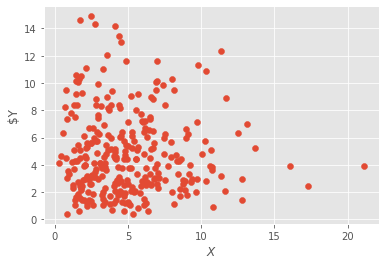

In [24]:
plt.scatter(sample1, sample2)
plt.ylabel('$Y')
plt.xlabel('$X$');

array([[57., 51., 24., 12.,  6.],
       [43., 40., 19.,  9.,  1.],
       [13., 10.,  5.,  2.,  1.],
       [ 2.,  2.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.]])

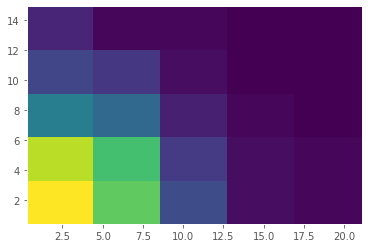

In [36]:
res = plt.hist2d(sample1, sample2, bins = 5)
res[0]

In [25]:
chi2, pv, ddof, array = stats.chi2_contingency(res[0])
print(chi2, pv)
array

4.045662046403931 0.9988225384853396


array([[5.80000000e+01, 5.20000000e+01, 2.45000000e+01, 1.15000000e+01,
        4.00000000e+00],
       [4.33066667e+01, 3.88266667e+01, 1.82933333e+01, 8.58666667e+00,
        2.98666667e+00],
       [1.19866667e+01, 1.07466667e+01, 5.06333333e+00, 2.37666667e+00,
        8.26666667e-01],
       [1.93333333e+00, 1.73333333e+00, 8.16666667e-01, 3.83333333e-01,
        1.33333333e-01],
       [7.73333333e-01, 6.93333333e-01, 3.26666667e-01, 1.53333333e-01,
        5.33333333e-02]])

In [38]:
n_row = []
n_col = [0, 0, 0, 0, 0]
for row in res[0]:
    n_row.append(sum(row))
for i in range(len(res[0])):
    for j in range(len(res[0][i])):
        n_col[j] += res[0][i][j] 

#p = np.array(n_row)/n
#q = np.array(n_col)/n

teoretic_table = [[0]*len(n_col), [0]*len(n_col), [0]*len(n_col), [0]*len(n_col), [0]*len(n_col)]

for i in range(len(n_row)):
    for j in range(len(n_col)):
        teoretic_table[i][j] = n_row[i] * n_col[j] / n    
for i in teoretic_table:
    print(i)

    
z = 0
for i in range(len(n_row)):
    for j in range(len(n_col)):
        z += ((res[0][i][j] - teoretic_table[i][j])**2/teoretic_table[i][j])
        
print(z)

[58.0, 52.0, 24.5, 11.5, 4.0]
[43.306666666666665, 38.82666666666667, 18.293333333333333, 8.586666666666666, 2.986666666666667]
[11.986666666666666, 10.746666666666666, 5.0633333333333335, 2.3766666666666665, 0.8266666666666667]
[1.9333333333333333, 1.7333333333333334, 0.8166666666666667, 0.38333333333333336, 0.13333333333333333]
[0.7733333333333333, 0.6933333333333334, 0.32666666666666666, 0.15333333333333332, 0.05333333333333334]
4.04566204640393


# Исследование корреляционной связи 

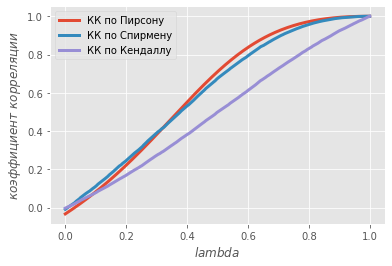

In [30]:
x = np.linspace(0, 1, 300)
y = []
y_p = []
y_t = []

for j in range(0, 300):
  sample_U = []
  lam = x[j] 
  for i in range(0, 300):
    u = lam * sample1[i] + (1 - lam) * sample2[i]
    sample_U.append(u)
  r = stats.pearsonr(sample1, sample_U)[0]
  p = stats.spearmanr(sample1, sample_U)[0]
  t = stats.kendalltau(sample1, sample_U)[0]

  y.append(r)
  y_p.append(p)
  y_t.append(t)

plt.plot(x, y, lw=3, label="КК по Пирсону")
plt.plot(x, y_p, lw=3, label = "КК по Спирмену")
plt.plot(x, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');


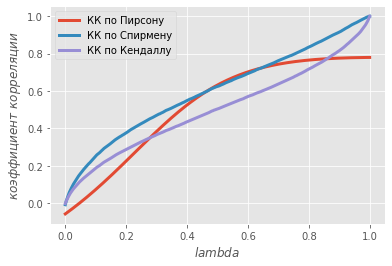

In [31]:
x = np.linspace(0, 1, 300)
y = []
y_p = []
y_t = []

for j in range(0, 300):
  sample_U = []
  lam = x[j] 
  for i in range(0, 300):
    u = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_U.append(u)
  r = stats.pearsonr(sample1, sample_U)[0]
  p = stats.spearmanr(sample1, sample_U)[0]
  t = stats.kendalltau(sample1, sample_U)[0]

  y.append(r)
  y_p.append(p)
  y_t.append(t)

plt.plot(x, y, lw=3, label="КК по Пирсону")
plt.plot(x, y_p, lw=3, label = "КК по Спирмену")
plt.plot(x, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');

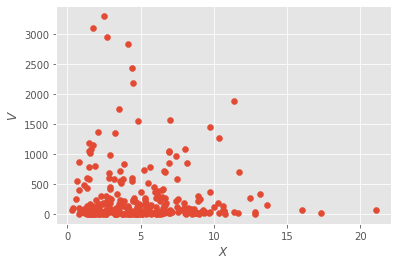

In [32]:
lam = 0
sample_U = []
for i in range(0, 300):
    u = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_U.append(u)

plt.scatter(sample1, sample_U)
plt.ylabel('$V$')
plt.xlabel('$X$');

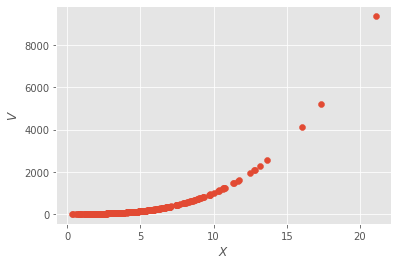

In [33]:
lam = 1
sample_U = []
for i in range(0, 300):
    u = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_U.append(u)

plt.scatter(sample1, sample_U)
plt.ylabel('$V$')
plt.xlabel('$X$');

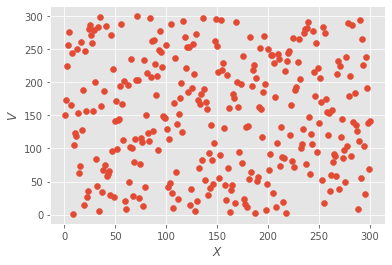

In [34]:
lam = 0
sample_V = []
for i in range(0, 300):
    v = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_V.append(v)

sample_V_rank = stats.rankdata(sample_V)
sample1_rank = stats.rankdata(sample1)
plt.scatter(sample1_rank, sample_V_rank)
plt.ylabel('$V$')
plt.xlabel('$X$');

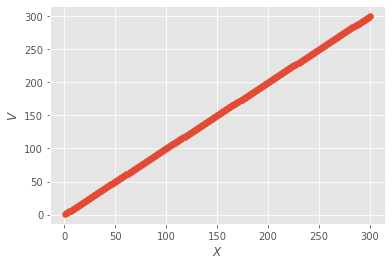

In [35]:
lam = 1
sample_V = []
for i in range(0, 300):
    v = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_V.append(v)

sample_V_rank = stats.rankdata(sample_V)
sample1_rank = stats.rankdata(sample1)
plt.scatter(sample1_rank, sample_V_rank)
plt.ylabel('$V$')
plt.xlabel('$X$');